# Introduction

In this preliminary work, we will visualize the data and draw some first results.

## Data filtering

As we have different csv files containing the data, the first thing to do is to merge them together.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# First, we import the four csv files that we are going to use
df1 = pd.read_csv("./data/caracteristics.csv", encoding='latin-1')
df2 = pd.read_csv("./data/places.csv", encoding="latin-1")
df3 = pd.read_csv("./data/users.csv", encoding="latin-1")
df4 = pd.read_csv("./data/vehicles.csv", encoding="latin-1")

# Then, we merge all the dataframes together using the column 'Num_Acc' that they have in common
df1 = pd.merge(df1, df2, how="outer", on="Num_Acc")
df2 = pd.merge(df3, df4, how='outer', on="Num_Acc")

data = pd.merge(df1, df2, how='outer', on="Num_Acc")

Then we filter it by selecting only the columns we are interested in.

In [3]:
# Here, we select the columns that we want to keep and we rename it appropriately
columns = ['an', 'mois', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu', 'lum', 'atm', 'catr', 'surf']

data = data[columns]
data.columns = ['Year', 'Month', 'User category', 'Severity', 'Sex', 'Year of birth', 'Trip purpose', 'Securiy', 'Luminosity', 'Weather', 'Type of road', 'Road surface']

data

,Year,Month,User category,Severity,Sex,Year of birth,Trip purpose,Securiy,Luminosity,Weather,Type of road,Road surface
0,16,2,1,1,2,1983.0,0.0,11.0,1,8.0,3.0,1.0
1,16,2,1,1,2,1983.0,0.0,11.0,1,8.0,3.0,1.0
2,16,2,1,3,1,2001.0,9.0,21.0,1,8.0,3.0,1.0
3,16,2,1,3,1,2001.0,9.0,21.0,1,8.0,3.0,1.0
4,16,3,1,3,1,1960.0,5.0,11.0,1,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3553971,5,12,1,4,1,1990.0,5.0,23.0,1,2.0,4.0,1.0
3553972,5,12,1,4,1,1990.0,5.0,23.0,1,2.0,4.0,1.0
3553973,5,12,1,4,1,1990.0,5.0,23.0,1,2.0,4.0,1.0
3553974,5,12,1,4,1,1951.0,0.0,13.0,5,2.0,2.0,2.0


## Plots

First, we plot the number of accidents that occurred each month from January 2005 to December 2016

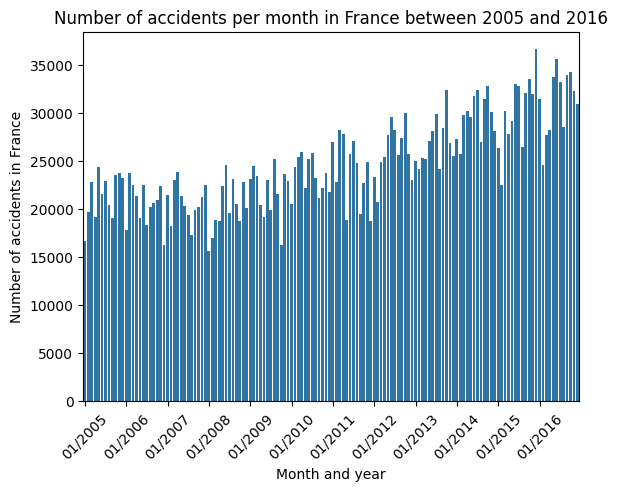

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# We create a dataframe 'time' with only the information about the time of the accidents
time = data[['Year', 'Month']]

# We add a column 'Year-Month' containing the month and the year of the accident
time['Year-Month'] = time['Year'].astype('str') + " - " + time['Month'].astype('str')

# We plot first the number of accidents per month
plt.figure()

sns.countplot(data=time, x='Year-Month')

plt.xlabel("Month and year")
plt.ylabel("Number of accidents in France")
plt.xticks(ticks=[i for i in range(0, 144, 12)], labels=["01/"+ str(i) for i in range(2005,2017)], rotation=45)
plt.title("Number of accidents per month in France between 2005 and 2016")
plt.show()

We can observe that the number of accidents in France tend to increase along time. To verify this hypothesis, let’s plot the number of accidents through years:

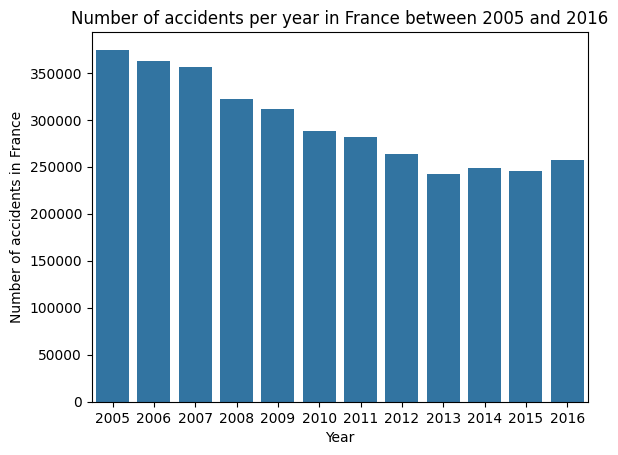

In [5]:
# We plot the number of accidents per year
plt.figure()

sns.countplot(data=time, x='Year')

plt.xticks(ticks=plt.xticks()[0], labels=range(2005,2017))
plt.ylabel("Number of accidents in France")
plt.title("Number of accidents per year in France between 2005 and 2016")
plt.show()

Paradoxically, we observe that the number of accidents per year decreases: from above 350000 in 2005 to approximately 250000 in 2016. If we look again at the first plot, we can observe that during the first years, the number of accidents through months is more regular than in the last years (where there are a lot of peaks). Then, maybe this contradiction is because in 2016 there are months during which the number of accidents is way bigger than during the others, so we have the impression that in the first plot the numbers of accidents increases whereas in reality it decreases through years.

Let’s now look at the number of accidents for each month:

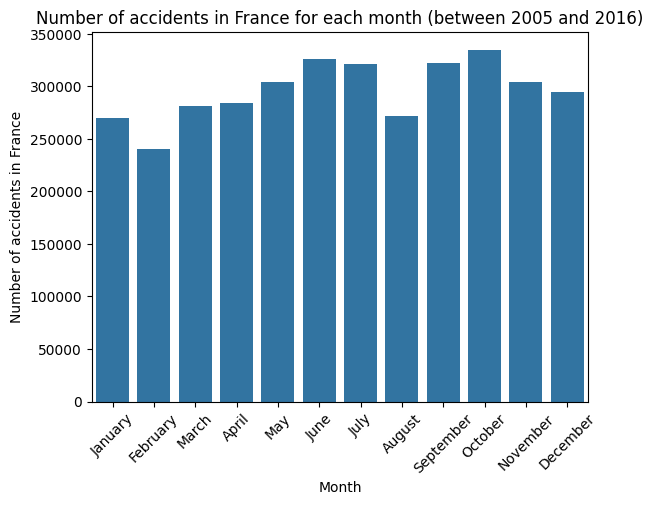

In [6]:
# We plot the number of accidents per month, no matter what the year is
plt.figure()

sns.countplot(data=time, x='Month')

plt.xticks(ticks=plt.xticks()[0], labels=['January', 'February','March','April','May','June','July','August','September','October','November',"December"], rotation=45)

plt.ylabel("Number of accidents in France")
plt.title("Number of accidents in France for each month (between 2005 and 2016)")
plt.show()

We could have thought about several hypothesis such as the fact that there will be a lot of accidents during the summer holidays (July and August) because more people are using the car to go in vacation, or the fact that in winter there are much more cars on the roads so it leads to more accidents, but we can see that these hypotheses are false. We observe that the peaks of accidents are reached in June, July, and October while the lowest numbers of accidents are reached in February and August.